In [13]:
from pathlib import Path
import pandas as pd

In [14]:
def metrics_to_df(dataset: pd.DataFrame, classifier_name: str, y_pred_label: str):
    # metrics for a single classifier
    import sklearn.metrics as metrics

    y_true = dataset["is_gpt"]
    y_predicted = dataset[y_pred_label]

    df = pd.DataFrame(
        columns=[
            "classifier",
            "tn",
            "fp",
            "fn",
            "tp",
            "precision",
            "recall",
            "f1-score",
            "accuracy",
        ],
    )

    confusion_matrix = list(
        metrics.confusion_matrix(y_true=y_true, y_pred=y_predicted).ravel()
    )  # ["tn", "fp", "fn", "tp"]

    precision_recall_fscore_support = list(
        metrics.precision_recall_fscore_support(
            y_true=y_true, y_pred=y_predicted, average="binary"
        )[:-1]
    )  # precision, recall, f1-score

    accuracy = metrics.accuracy_score(y_true=y_true, y_pred=y_predicted)

    row = (
        [classifier_name]
        + confusion_matrix
        + precision_recall_fscore_support
        + [accuracy]
    )

    df.loc[classifier_name] = row

    return df


def metrics_to_csv(dataset: pd.DataFrame):
    # create metrics dataframe

    gptzero_metrics = metrics_to_df(dataset, "gptzero", "gptzero_score_overall")
    orginalityai_metrics = metrics_to_df(
        dataset, "originalityai", "originality_score_overall"
    )

    csv = pd.concat([gptzero_metrics, orginalityai_metrics])
    csv.to_csv("./results/all_metrics.csv", index=False)

    return csv


results = pd.read_csv(Path("./results/results.csv"))
classifer_metrics = metrics_to_csv(results)

classifer_metrics

,classifier,tn,fp,fn,tp,precision,recall,f1-score,accuracy
gptzero,gptzero,54,1,21,36,0.972973,0.631579,0.765957,0.803571
originalityai,originalityai,49,6,0,57,0.904762,1.000000,0.950000,0.946429


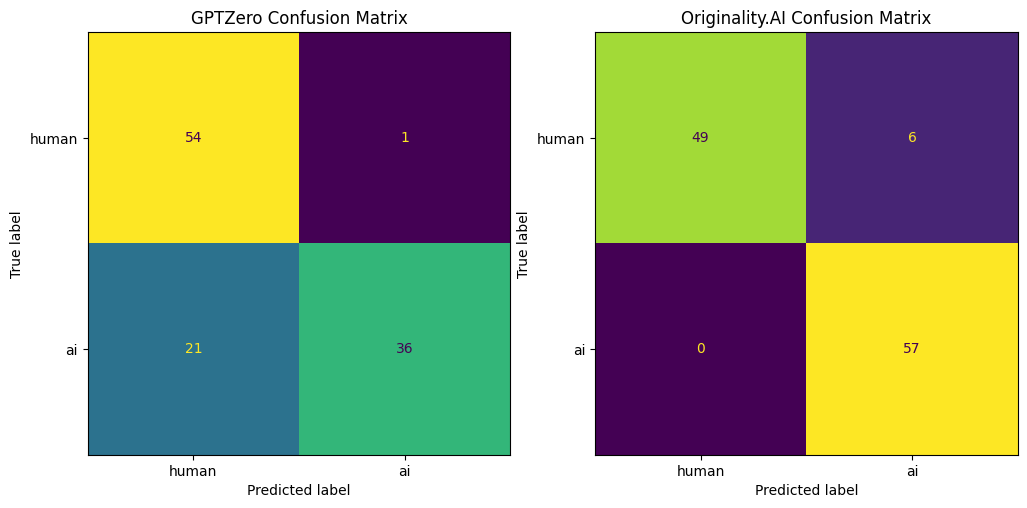

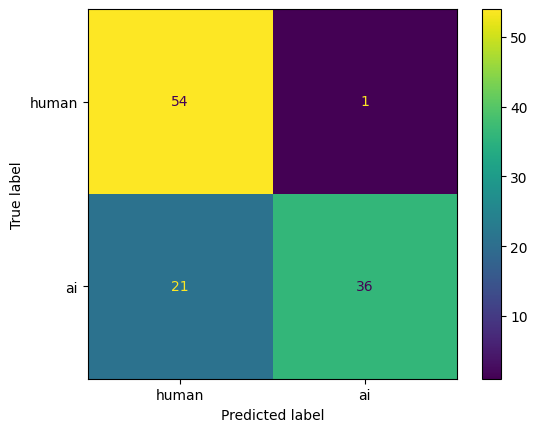

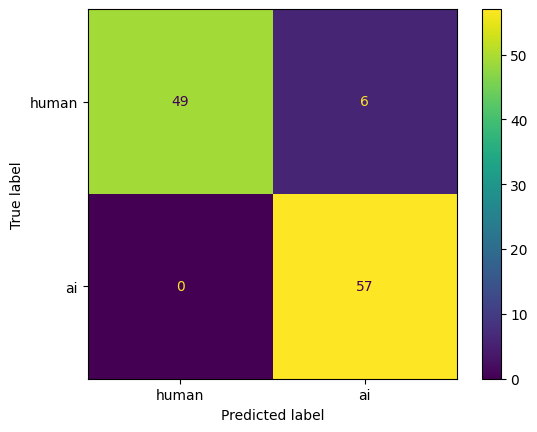

In [15]:
def confusion_matrix_plot(pred_label: str):
    from sklearn.metrics import ConfusionMatrixDisplay

    y_test = results["is_gpt"]
    predictions = results[pred_label]

    disp = ConfusionMatrixDisplay.from_predictions(
        y_true=y_test, y_pred=predictions, display_labels=["human", "ai"]
    )

    return disp


def visualize_confusion_matrix():
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

    ax1.set_title("GPTZero Confusion Matrix")
    ax2.set_title("Originality.AI Confusion Matrix")

    confusion_matrix_plot("gptzero_score_overall").plot(ax=ax1, colorbar=False)
    confusion_matrix_plot("originality_score_overall").plot(ax=ax2, colorbar=False)

    fig.savefig("./results/confusion_matrix.png")


visualize_confusion_matrix()

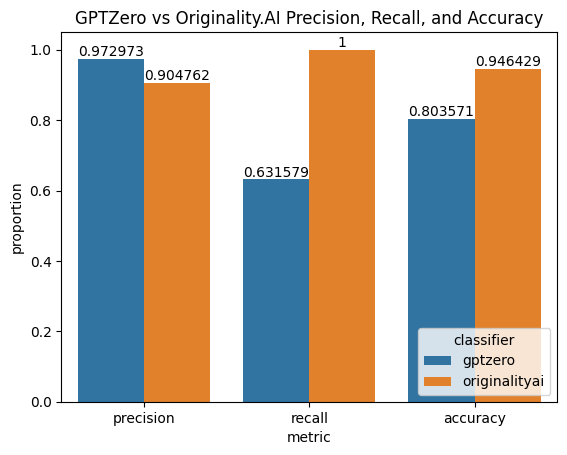

In [16]:
import seaborn as sns


def metrics_to_dataframe(
    dataset: pd.DataFrame, classifier_name: str, y_pred_label: str
):
    # metrics for a single classifier
    import sklearn.metrics as metrics

    y_true = dataset["is_gpt"]
    y_predicted = dataset[y_pred_label]

    df = pd.DataFrame(
        columns=["classifier", "metric", "proportion"],
    )

    precision_recall_fscore_support = list(
        metrics.precision_recall_fscore_support(
            y_true=y_true, y_pred=y_predicted, average="binary"
        )[:-2]
    )  # precision, recall

    accuracy = metrics.accuracy_score(y_true=y_true, y_pred=y_predicted)

    metrics = dict(
        zip(
            ["precision", "recall", "accuracy"],
            list(precision_recall_fscore_support + [accuracy]),
        )
    )

    for metric, probability in metrics.items():
        df.loc[classifier_name + "_" + metric] = [classifier_name, metric, probability]

    return df


def sns_metrics(dataset: pd.DataFrame):
    # create metrics dataframe

    gptzero_metrics = metrics_to_dataframe(dataset, "gptzero", "gptzero_score_overall")

    orginalityai_metrics = metrics_to_dataframe(
        dataset, "originalityai", "originality_score_overall"
    )

    csv = pd.concat(
        [gptzero_metrics, orginalityai_metrics],
    )
    csv.to_csv("./results/metrics.csv", index=False)

    return csv


results = pd.read_csv(Path("./results/results.csv"))

ax = sns.barplot(data=sns_metrics(results), x="metric", y="proportion", hue="classifier")

sns.move_legend(ax, 'lower right')
ax.set_title('GPTZero vs Originality.AI Precision, Recall, and Accuracy')

for i in ax.containers:
    ax.bar_label(i,)


In [21]:
max(data['words'])

916